# PROJECT PROPOSAL #

## UCI Heart Disease

### Introduction ##

Cardiovascular diseases remain the leading cause of mortality worldwide. Among the various indicators of heart health, 
maximum heart rate achieved during exercise (thalach) and ST depression induced by exercise relative to rest (oldpeak) 
are crucial parameters often assessed during stress tests. Understanding how these parameters predict the presence of heart disease can provide valuable insights into personalized medicine and early diagnosis.

#### RESEARCH QUESTION

Can maximum heart rate achieved during exercise and ST depression induced by exercise accurately predict the presence of heart disease? 

#### Dataset:
We will use the UCI Heart Disease dataset, a well-known dataset in the field of cardiovascular research. This dataset includes various medical attributes related to heart disease diagnosis, collected from multiple sources. The specific variables of interest for this study are thalach, oldpeak, with the target variable being the presence of heart disease (num)

This project will comprehensively explore the predictive power of thalach and oldpeak on heart disease, providing insights and potentially contributing to improved diagnostic tools in cardiovascular health.

In [66]:
library(tidyverse)
library(tidymodels)
set.seed(1)

### Reading Data

In [67]:
heart_disease <- read_csv("data/heart_disease/processed.cleveland.data", col_names = FALSE)
colnames(heart_disease) <- c("age", "sex", "cp", "testbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Cleaning and wrangling Data

In [68]:
heart_disease <- filter(heart_disease, age > 35) |>
                select(age, sex, thalach, num, oldpeak,) |>
                mutate(sex = as_factor(sex), num = as_factor(num))|>
                mutate(sex = fct_recode(sex, "M" = "1", "F" = "0")) |>
                drop_na()

#### Spliting data into training and testing data, 
75% of the data will be used for training and 25% for testing.

In [92]:
set.seed(1)
heart_disease_split <- initial_split(heart_disease, prop = 0.75, strata = num)
heart_disease_training <- training(heart_disease_split)
heart_disease_testing <- testing(heart_disease_split)

#### calculating the mean thalach and oldpeak by the presence of heart disease categories

In [115]:
ggtitle("Table 1: Summary of Training Data with Mean Maximum Heart Rate(thalach) and Mean ST Depression grouped by heart disease(oldpeak)")
heart_disease_training |>
    group_by(num) |>
    summarize(old_peak_mean = mean(oldpeak), thalach_mean = mean(thalach))

$title
[1] "Table 1: Summary of Training Data with Mean Maximum Heart Rate(thalach) and Mean ST Depression grouped by heart disease(oldpeak)"

attr(,"class")
[1] "labels"

num,old_peak_mean,thalach_mean
<fct>,<dbl>,<dbl>
0,0.6100000,157.9667
1,0.9829268,144.4390
2,1.9240000,133.2800
3,1.8346154,133.6538
4,1.9666667,141.5556


In [117]:
ggtitle("Table 2: Summary of Training Data with number of observations per heart disease")
heart_disease_training |>
    group_by(num) |>
    summarize(count = n())

$title
[1] "Table 2: Summary of Training Data with number of observations per heart disease"

attr(,"class")
[1] "labels"

num,count
<fct>,<int>
0,120
1,41
2,25
3,26
4,9


#### Building a summary containing the number of observations, females, males, mean of thalach, mean of oldpeak and number of missing data

In [118]:
ggtitle("Table 3:Summary of Training Data with Number of Observations, Gender Distribution, Mean Maximum Heart Rate, Mean ST Depression, and Number of Missing Data")
summary_table <- heart_disease_training |>
  summarise(
    count = n(),
    num_males = sum(sex == "M"),
    num_females = sum(sex == "F"),
    mean_thalach = mean(thalach, na.rm = TRUE),
    mean_oldpeak = mean(oldpeak, na.rm = TRUE),
    num_missing = sum(is.na(heart_disease))
  )
summary_table

$title
[1] "Table 3:Summary of Training Data with Number of Observations, Gender Distribution, Mean Maximum Heart Rate, Mean ST Depression, and Number of Missing Data"

attr(,"class")
[1] "labels"

count,num_males,num_females,mean_thalach,mean_oldpeak,num_missing
<int>,<int>,<int>,<dbl>,<dbl>,<int>
221,154,67,149.1357,1.027149,0


### Visualizing Data

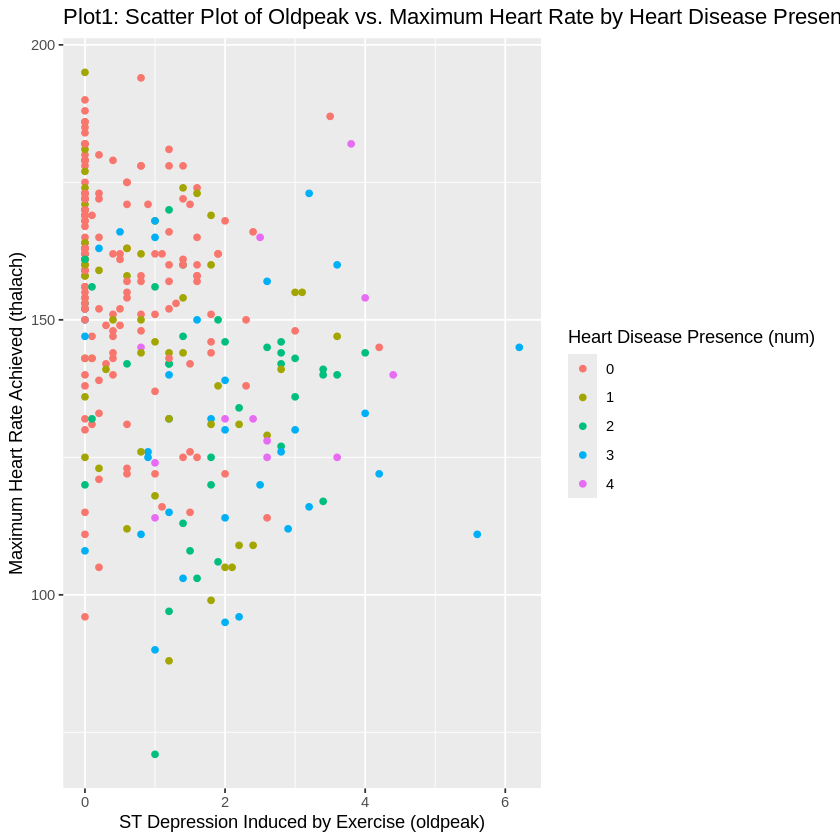

In [119]:
ggplot(heart_disease, aes(x = oldpeak, y = thalach, color = num)) +
  geom_point() +
  labs(title = "Plot1: Scatter Plot of Oldpeak vs. Maximum Heart Rate by Heart Disease Presence",
       x = "ST Depression Induced by Exercise (oldpeak)",
       y = "Maximum Heart Rate Achieved (thalach)",
       color = "Heart Disease Presence (num)") 

#### Calculate the correlation coefficient

In [97]:
cor_oldpeak_chol <- cor(heart_disease$oldpeak, heart_disease$thalach, use = "complete.obs")
cor_oldpeak_chol

[1] -0.3370591

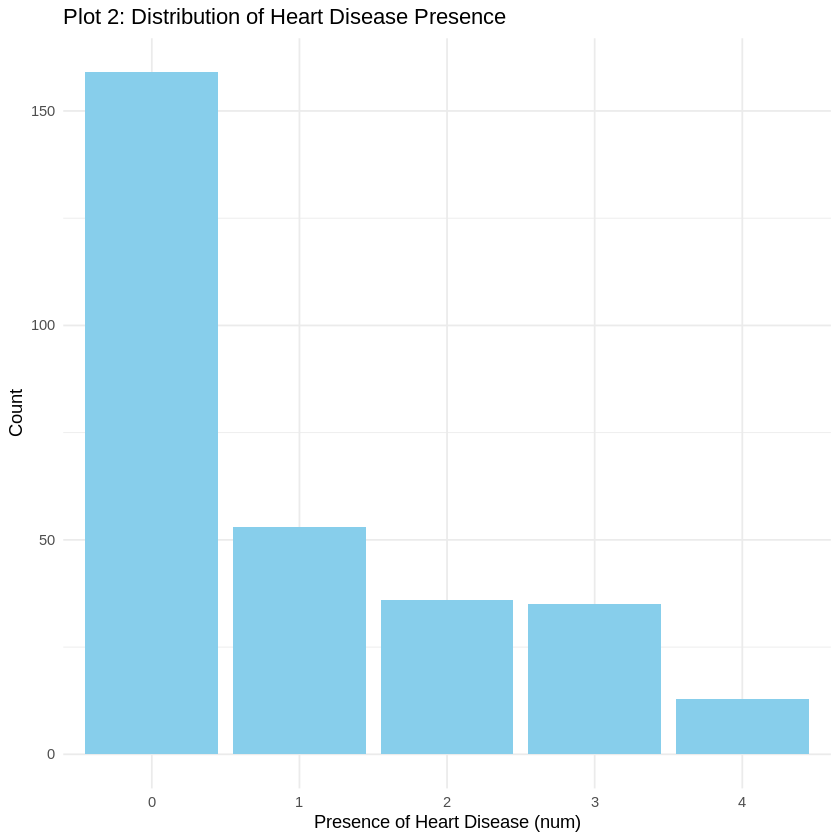

In [120]:
ggplot(heart_disease, aes(x = as.factor(num))) +
  geom_bar(fill = "skyblue") +
  labs(title = "Plot 2: Distribution of Heart Disease Presence",
       x = "Presence of Heart Disease (num)",
       y = "Count") +
  theme_minimal()

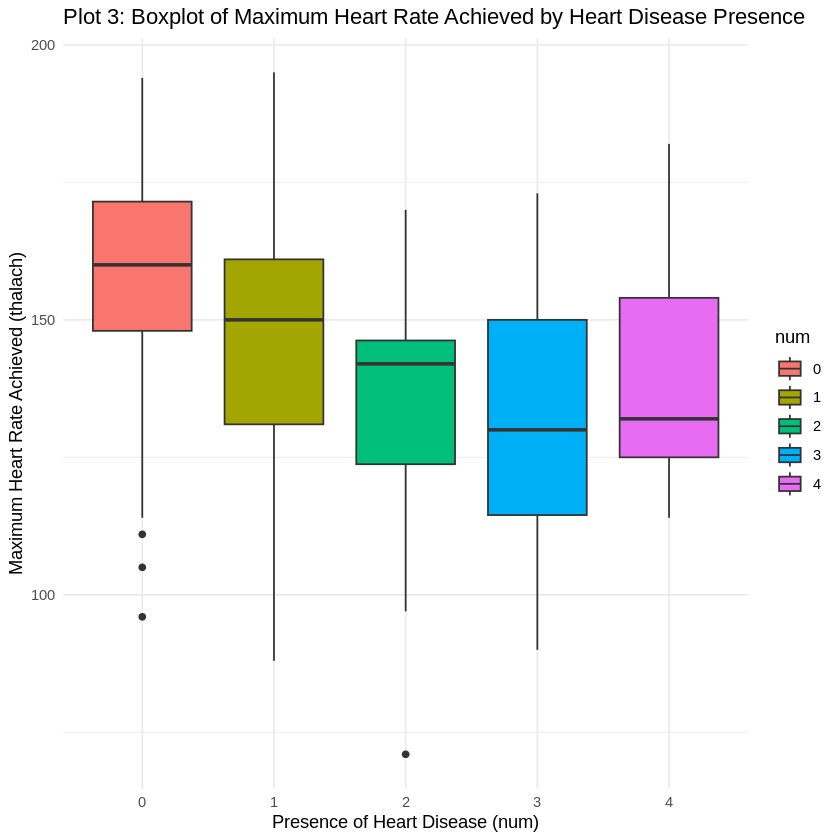

In [121]:
ggplot(heart_disease, aes(x = num, y = thalach, fill = num)) +
  geom_boxplot() +
  labs(title = "Plot 3: Boxplot of Maximum Heart Rate Achieved by Heart Disease Presence",
       x = "Presence of Heart Disease (num)",
       y = "Maximum Heart Rate Achieved (thalach)") +
  theme_minimal()

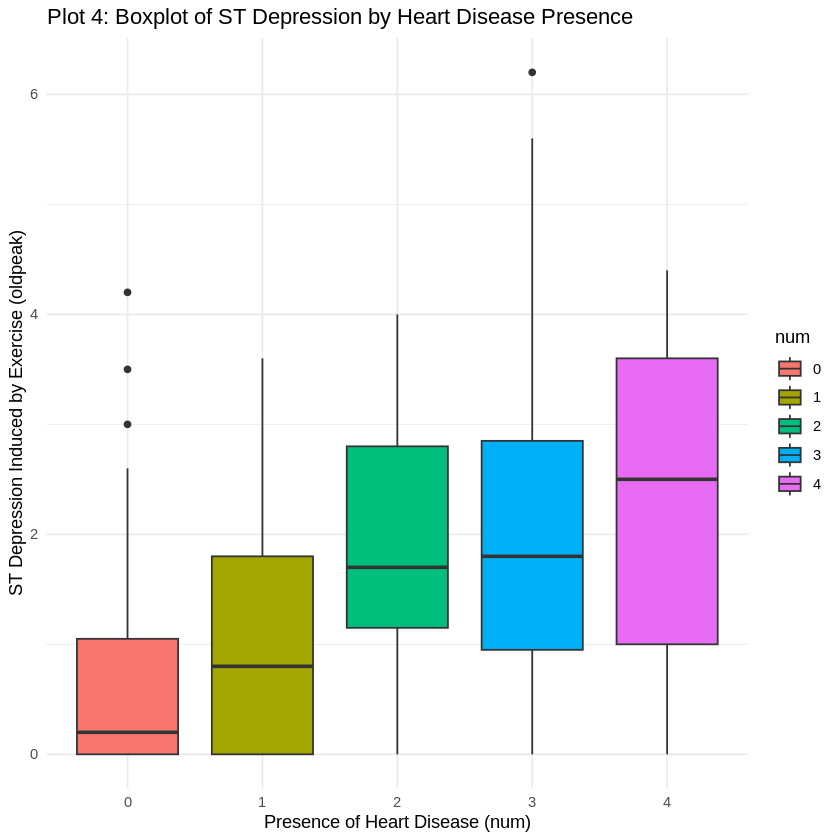

In [122]:
ggplot(heart_disease, aes(x = num, y = oldpeak, fill = num)) +
  geom_boxplot() +
  labs(title = "Plot 4: Boxplot of ST Depression by Heart Disease Presence",
       x = "Presence of Heart Disease (num)",
       y = "ST Depression Induced by Exercise (oldpeak)") +
  theme_minimal()

Based on the plot and the correlation value of -0.34 between oldpeak and thalach, we can conclude that there is a low to moderate negative relationship between these variables, indicating a non-linear association. Additionally, the box plot shows that the presence of heart disease is associated with a decrease in maximum heart rate (thalach) and an increase in ST depression (oldpeak).

### Expected Outcomes and Significance
#### Expected Findings:
Lower maximum heart rate achieved (thalach) and higher ST depression induced by exercise (oldpeak) is expected to be significant predictors of heart disease presence.

#### Impact:
The findings could improve non-invasive heart disease prediction models, aiding in early diagnosis and personalized treatment plans.

#### Future Questions:
Assess the effectiveness of different interventions (e.g., exercise programs, medications) on modifying thalach and oldpeak and subsequently reducing heart disease risk.

## Method
A k-nearest neighbors (k-NN) classification model is used to predict the presence of heart disease based on thalach and oldpeak. The data is preprocessed by scaling and centering all predictors. A grid search is performed to tune the hyperparameter k.

In [101]:
set.seed(1)
heart_disease_vfold <- vfold_cv(heart_disease_training, v=5, strata = num)

In [102]:
heart_disease_recipe <- recipe(num ~oldpeak + thalach, data = heart_disease_training) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())
heart_disease_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [103]:
heart_disease_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                    set_engine("kknn") |>
                    set_mode("classification")
heart_disease_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [104]:
set.seed(1)
k_vals <- tibble(neighbors = seq(1:100))
heart_disease_workflow <- workflow() |>
                        add_recipe(heart_disease_recipe) |>
                        add_model(heart_disease_spec) |>
                        tune_grid(resamples = heart_disease_vfold, grid = k_vals)

In [105]:
heart_disease_accuracies<- heart_disease_workflow |>
            collect_metrics() |>
            filter(.metric == "accuracy")

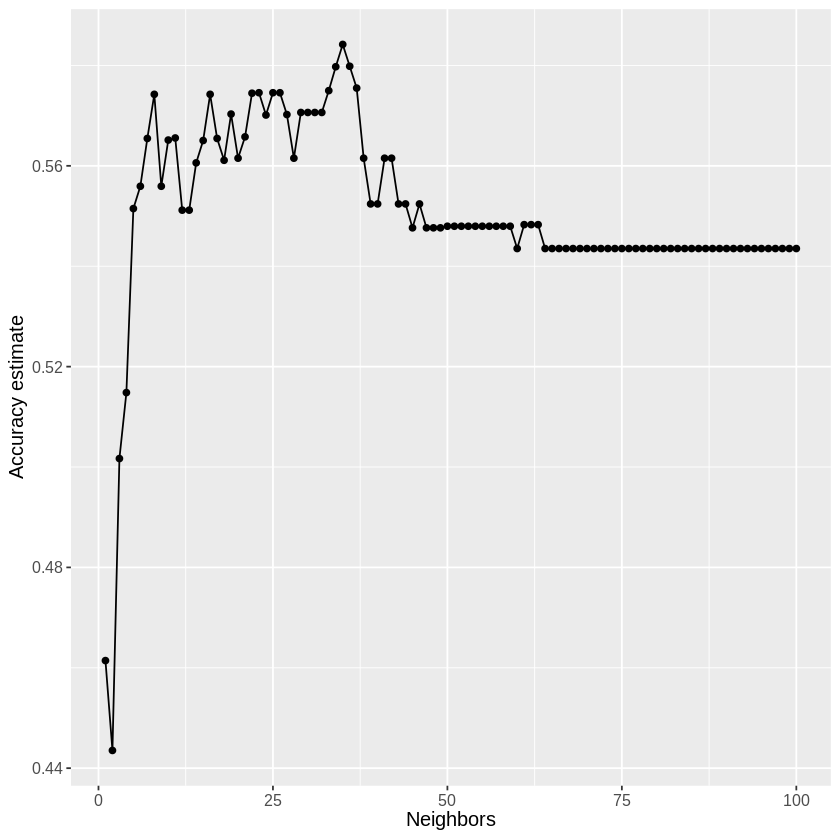

In [106]:
heart_disease_accuracies_plot <- ggplot(heart_disease_accuracies, aes(x = neighbors, y=mean)) +
                                geom_point() +
                                geom_line() +
                                labs(x="Neighbors", y = "Accuracy estimate") +
                                theme(text = element_text(size =12))
heart_disease_accuracies_plot

In [107]:
best_k <- heart_disease_accuracies |>
        slice_max(mean, n=1) |>
        pull(neighbors)
best_k

[1] 35

In [108]:
heart_disease_finalspecs <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
                            set_engine("kknn") |>
                            set_mode("classification")
heart_disease_recipe <- recipe(num ~oldpeak + thalach, data = heart_disease_training) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())
heart_disease_finalworkflow <- workflow() |>
                            add_recipe(heart_disease_recipe) |>
                            add_model(heart_disease_finalspecs) |>
                            fit(data = heart_disease_training)


In [109]:
test_prediction <- predict(heart_disease_finalworkflow, heart_disease_testing) |>
                bind_cols(heart_disease_testing)
test_prediction

.pred_class,age,sex,thalach,num,oldpeak
<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
0,37,M,187,0,3.5
0,56,M,178,0,0.8
0,57,F,163,0,0.6
0,56,M,142,2,0.6
0,44,M,173,0,0.0
0,52,M,162,0,0.5
0,54,M,160,0,1.2
0,48,F,139,0,0.2
0,58,M,160,1,1.8


In [110]:
test_prediction |>
        metrics(truth = num, estimate = .pred_class) |>
        filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5466667


In [111]:
test_prediction |> pull(num) |> levels()

[1] "0" "1" "2" "3" "4"

In [112]:
test_prediction |>
        precision(truth = num, estimate = .pred_class, event_level = "fifth")

Warning message:
“While computing multiclass `precision()`, some levels had no predicted events (i.e. `true_positive + false_positive = 0`). 
Precision is undefined in this case, and those levels will be removed from the averaged result.
Note that the following number of true events actually occured for each problematic event level:
'4': 4”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.3313492


In [113]:
test_prediction |>
        recall(truth = num, estimate = .pred_class, event_level = "fifth")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro,0.2534577


In [114]:
conf_matrix <- test_prediction |>
            conf_mat(truth = num, estimate = .pred_class)
conf_matrix

          Truth
Prediction  0  1  2  3  4
         0 38 11  8  5  1
         1  0  0  1  0  0
         2  0  1  2  3  3
         3  1  0  0  1  0
         4  0  0  0  0  0

## Results of the k-NN Model
Accuracy: The model achieved an accuracy of 54.67% on the test set. This indicates that the model correctly predicted the presence or absence of heart disease in about half of the cases.

#### Precision and Recall:

Precision: The macro average precision was 33.13%, indicating that the model had a moderate ability to identify true positive cases out of all positive predictions.
Recall: The macro average recall was 25.34%, showing that the model had a lower ability to identify true positive cases out of all actual positive cases.
Confusion Matrix:

The confusion matrix shows that the model correctly identified a significant number of no heart disease cases (0) but struggled with correctly predicting higher heart disease categories (1-4).

## Discussion
The k-NN model provided moderate predictive performance with an accuracy of 53.95%. The low precision and recall suggest that the model has limitations in correctly identifying heart disease cases, particularly the higher severity categories.

#### Possible Reasons for Moderate Performance:

Data Imbalance: The dataset has more instances of no heart disease compared to higher severity categories, which might have influenced the model's performance.
Feature Selection: Only two features (thalach and oldpeak) were used. Including more relevant features might improve the model's performance.

#### Conclusion:
While the k-NN model showed some predictive capability, there is room for improvement. Future work could involve using more advanced models, addressing data imbalance, and incorporating additional features to enhance predictive accuracy.



## References:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository. http://archive.ics.uci.edu/ml

"Heart Disease Dataset", UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease